In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 로딩
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Train
batch_size = train_images.shape[0]
input_dim = train_images.shape[1] *  train_images.shape[2]
X_train = np.reshape(train_images, (batch_size, input_dim))
print("train_images의 shape: ",end="")
print(train_images.shape)
print("Flatten 전: (" + str(train_images.shape[1]) +", "+ str(train_images.shape[2]) +"), 후: " + str(input_dim))

print("결과")
print(X_train.shape)

# Test
batch_size = test_images.shape[0]
input_dim = test_images.shape[1] *  test_images.shape[2]
X_test = np.reshape(test_images, (batch_size, input_dim))
print(X_test.shape)

X_train = X_train / 255.0
X_test = X_test / 255.0

train_images의 shape: (60000, 28, 28)
Flatten 전: (28, 28), 후: 784
결과
(60000, 784)
(10000, 784)


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# 레이블 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels) # one-hot encoding
Y_test = to_categorical(test_labels)
print('Y_train.shape is ', Y_train.shape)
print('one-hot encoded first Y_train is ', Y_train[0])

Y_train.shape is  (60000, 10)
one-hot encoded first Y_train is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 데이터의 개수를 확인하고 8:2 비율로 나눈다.
total = X_train.shape[0]
split_point = int(0.8 * total)

x_val = X_train[:split_point]
partial_x_train = X_train[split_point:]
y_val = Y_train[:split_point]
partial_y_train = Y_train[split_point:]

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 훈련
%matplotlib inline
hist = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=10,validation_data=(x_val, y_val))

Epoch 1/20
1200/1200 [==============================] - 17s 14ms/step - loss: 0.3342 - accuracy: 0.8971 - val_loss: 0.2279 - val_accuracy: 0.9317
Epoch 2/20
1200/1200 [==============================] - 16s 14ms/step - loss: 0.1389 - accuracy: 0.9582 - val_loss: 0.1958 - val_accuracy: 0.9402
Epoch 3/20
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0867 - accuracy: 0.9725 - val_loss: 0.2554 - val_accuracy: 0.9255
Epoch 4/20
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0633 - accuracy: 0.9787 - val_loss: 0.2762 - val_accuracy: 0.9276
Epoch 5/20
1200/1200 [==============================] - 13s 11ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.1791 - val_accuracy: 0.9518
Epoch 6/20
1200/1200 [==============================] - 12s 10ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.2273 - val_accuracy: 0.9499
Epoch 7/20
1200/1200 [==============================] - 15s 13ms/step - loss: 0.0368 - accuracy: 0.9877 - val_loss: 0.2025 -

In [17]:
# 잘못된 예측 찾기
pred = model.predict(X_test[:1600], batch_size=16, verbose=2)
# pred의 shape 출력
print(f"Shape of pred: {pred.shape}")

wrong = [i for i in range(1600) if np.argmax(pred[i]) != np.argmax(Y_test[i])]
wnum = len(wrong)
print(f"Number of wrong predictions: {wnum}")
# 각 잘못된 예측에 대한 tg_prob 계산
wrong_prob = [pred[i][np.argmax(Y_test[i])] for i in wrong]

print(f"Wrong predictions indices: {wrong}")
print(f"Wrong probabilities: {wrong_prob}")

100/100 - 0s - 147ms/epoch - 1ms/step
Shape of pred: (1600, 10)
Number of wrong predictions: 77
Wrong predictions indices: [6, 149, 151, 241, 247, 259, 320, 321, 340, 381, 417, 445, 448, 478, 495, 543, 578, 582, 583, 610, 613, 659, 691, 717, 720, 740, 760, 829, 844, 877, 881, 894, 900, 924, 938, 939, 944, 947, 959, 992, 1014, 1039, 1050, 1062, 1107, 1112, 1114, 1128, 1178, 1181, 1191, 1204, 1226, 1232, 1242, 1243, 1247, 1260, 1299, 1326, 1328, 1364, 1378, 1393, 1414, 1422, 1429, 1492, 1494, 1496, 1522, 1530, 1549, 1551, 1553, 1569, 1570]
Wrong probabilities: [0.03669937, 0.1928622, 1.52584e-05, 0.0004968824, 1.0258343e-07, 0.002152264, 0.0025853142, 1.2367035e-05, 0.22094905, 2.057948e-09, 0.15605015, 1.0482901e-05, 0.043024994, 0.047393035, 0.027539933, 0.06570009, 0.037582282, 1.1482744e-09, 0.3403425, 0.00046779783, 0.3270293, 0.2651674, 0.0057938024, 7.683536e-06, 1.371323e-07, 0.00024705043, 0.12100501, 8.789765e-07, 0.04132923, 0.25074023, 0.090777874, 0.43919235, 0.25427473, 0.0

In [14]:
# 예제번호와 tg_prob를 쌍으로 묶어서 리스트 wr_tg에 저장
wr_tg = list(zip(wrong, wrong_prob))
print(f"wr_tg: {wr_tg}")

wr_tg: [(6, 0.03669937), (149, 0.1928622), (151, 1.52584e-05), (241, 0.0004968824), (247, 1.0258343e-07), (259, 0.002152264), (320, 0.0025853142), (321, 1.2367035e-05), (340, 0.22094905), (381, 2.057948e-09), (417, 0.15605015), (445, 1.0482901e-05), (448, 0.043024994), (478, 0.047393035), (495, 0.027539933), (543, 0.06570009), (578, 0.037582282), (582, 1.1482744e-09), (583, 0.3403425), (610, 0.00046779783), (613, 0.3270293), (659, 0.2651674), (691, 0.0057938024), (717, 7.683536e-06), (720, 1.371323e-07), (740, 0.00024705043), (760, 0.12100501), (829, 8.789765e-07), (844, 0.04132923), (877, 0.25074023), (881, 0.090777874), (894, 0.43919235), (900, 0.25427473), (924, 0.005189839), (938, 6.9237816e-05), (939, 0.27792278), (944, 0.23873287), (947, 0.00018776918), (959, 0.09051426), (992, 0.11597806), (1014, 0.0011108748), (1039, 0.0015045222), (1050, 0.033549413), (1062, 0.0006857701), (1107, 0.04748798), (1112, 4.3439807e-09), (1114, 0.06905078), (1128, 0.031941988), (1178, 0.009458258), 

In [15]:
# 오름차순 정렬
sorted_wr_tg = sorted(wr_tg, key=lambda x: x[1])
print(f"sorted_wr_tg: {sorted_wr_tg}")

# numpy array로 변환
wr_tg_array = np.asarray(wr_tg)

sorted_wr_tg: [(1549, 5.5704347e-12), (582, 1.1482744e-09), (1232, 1.1604634e-09), (1181, 1.8287228e-09), (381, 2.057948e-09), (1112, 4.3439807e-09), (247, 1.0258343e-07), (1226, 1.2913245e-07), (1260, 1.3280656e-07), (720, 1.371323e-07), (829, 8.789765e-07), (1530, 3.5074318e-06), (1247, 6.7358014e-06), (717, 7.683536e-06), (445, 1.0482901e-05), (321, 1.2367035e-05), (1393, 1.43142515e-05), (151, 1.52584e-05), (938, 6.9237816e-05), (1328, 0.00013582046), (1522, 0.000172704), (947, 0.00018776918), (740, 0.00024705043), (1243, 0.00027549666), (610, 0.00046779783), (241, 0.0004968824), (1553, 0.0005913885), (1062, 0.0006857701), (1014, 0.0011108748), (1494, 0.0013763623), (1039, 0.0015045222), (259, 0.002152264), (1570, 0.0024443744), (320, 0.0025853142), (924, 0.005189839), (691, 0.0057938024), (1422, 0.0069090244), (1178, 0.009458258), (1378, 0.00988696), (1414, 0.012523318), (1204, 0.014005734), (1242, 0.025590133), (495, 0.027539933), (1569, 0.027671477), (1128, 0.031941988), (1050, 

Example Number: 6
True Label: 4
Predicted Label: 5
tg_prob: 0.03669936954975128


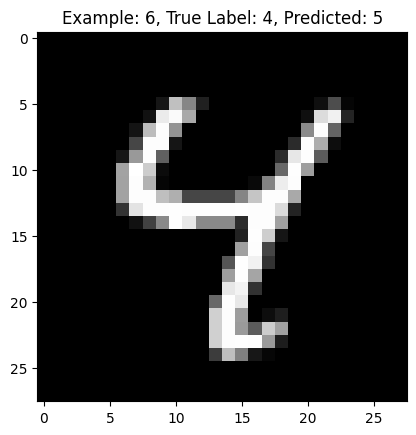

Example Number: 149
True Label: 2
Predicted Label: 3
tg_prob: 0.19286219775676727


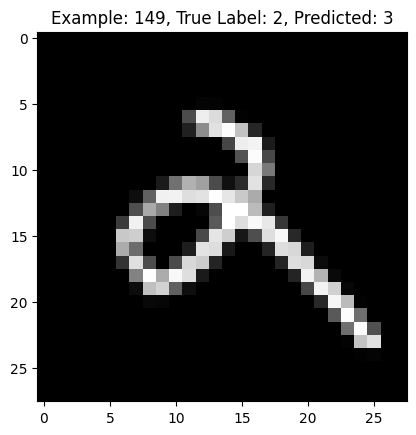

Example Number: 151
True Label: 9
Predicted Label: 8
tg_prob: 1.5258399798767641e-05


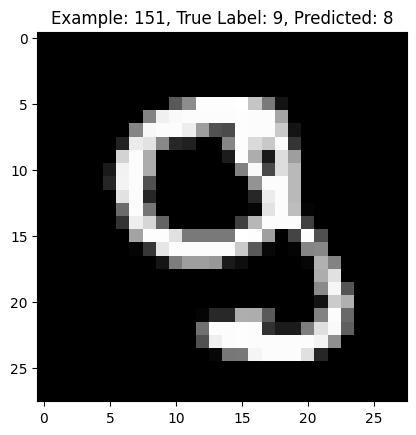

In [16]:
import matplotlib.pyplot as plt

res = wr_tg_array

# 가장 예측이 실패한 처음 3개의 예제에 대한 정보를 출력
for i in range(3):
    example_idx = int(res[i][0])
    true_label = test_labels[example_idx]
    predicted_label = np.argmax(pred[example_idx])
    tg_prob = res[i][1]

    # 정보 출력
    print(f"예제번호: {example_idx}")
    print(f"정답레이블: {true_label}")
    print(f"예측레이블: {predicted_label}")
    print(f"이 예제의 tg_prob: {tg_prob}")

    # 이미지 출력
    plt.imshow(test_images[example_idx], cmap='gray')
    plt.title(f"Example: {example_idx}, True Label: {true_label}, Predicted: {predicted_label}")
    plt.show()